# Task - 3

# Cat and Dog Image Classifier 


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:05<00:00, 192MB/s]
100% 1.06G/1.06G [00:05<00:00, 194MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,MaxPooling2D,Dropout

In [9]:
#generators -create batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
#creating CNN model

model = Sequential()


model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))


model.add(Flatten())


model.add(Dense (128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy' ,metrics=['accuracy'])

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import time

# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)) / 255.0

# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

# Training the model with reduced data and epochs for demonstration
start_time = time.time()
history = model.fit(train_ds.take(1000), epochs=5, validation_data=test_ds, verbose=1)
end_time = time.time()

print(f"Training completed in {end_time - start_time} seconds.")


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1000/1000 [==============================] - 17s 16ms/step - loss: 0.1916 - accuracy: 0.9412 - val_loss: 0.0673 - val_accuracy: 0.9789
Epoch 2/5
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0647 - accuracy: 0.9800 - val_loss: 0.0482 - val_accuracy: 0.9842
Epoch 3/5
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0430 - accuracy: 0.9876 - val_loss: 0.0603 - val_accuracy: 0.9815
Epoch 4/5
1000/1000 [==============================] - 17s 17ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0426 - val_accuracy: 0.9856
Epoch 5/5
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0263 - accuracy: 0.9909 - val_loss: 0.0547 - val_accuracy: 0.9843
Training completed in 94.63538026809692 seconds.


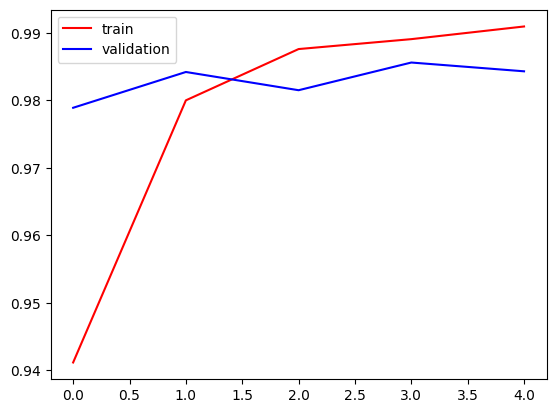

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

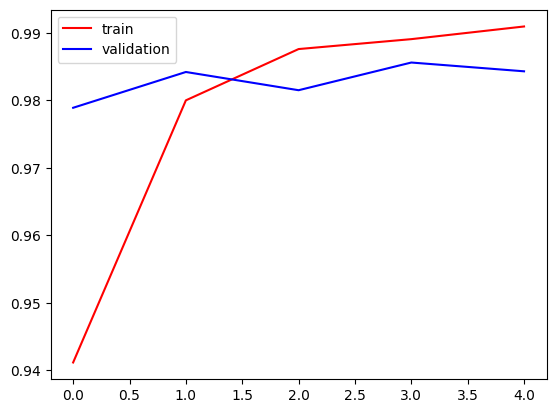

In [20]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

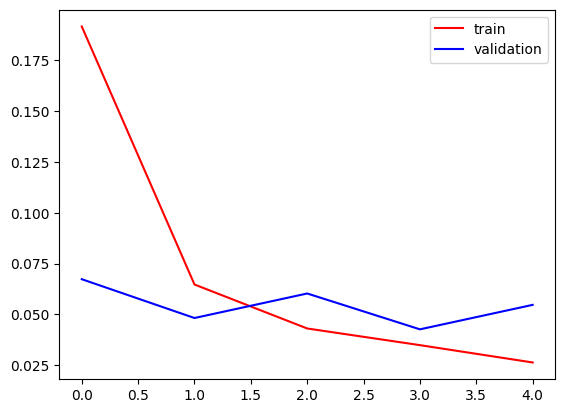

In [21]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

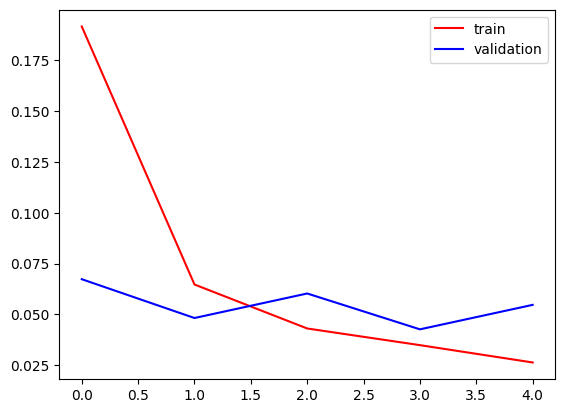

In [22]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [23]:
#need to reduce complexity
#add more data
#reducing complexity

In [24]:
import cv2

In [28]:
test_image = cv2.imread('/content/cat.jpg')

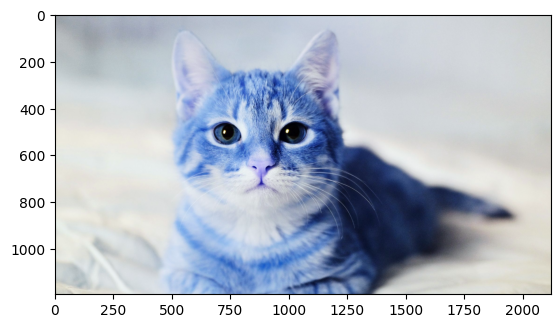

In [29]:
plt.imshow(test_image)

In [38]:
test_image = cv2.imread('/content/dog.jpg')

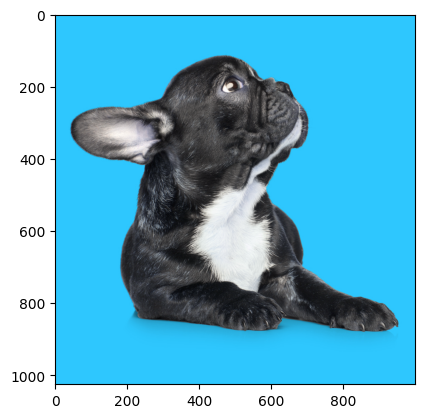

In [39]:
plt.imshow(test_image)

In [40]:
test_image.shape

(1025, 1000, 3)

In [41]:
test_image = cv2.resize(test_image,(256,256))

In [42]:
test_input = test_image.reshape(1,256,256,3)